# Plotting --- Non-Parametric Representation Learning with Kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Kernel_SSL_Journal/content2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Kernel_SSL_Journal/content2


In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('times-ro.ttf')
mpl.rc('font', family='serif')

# All datasets comparison


## Appendix

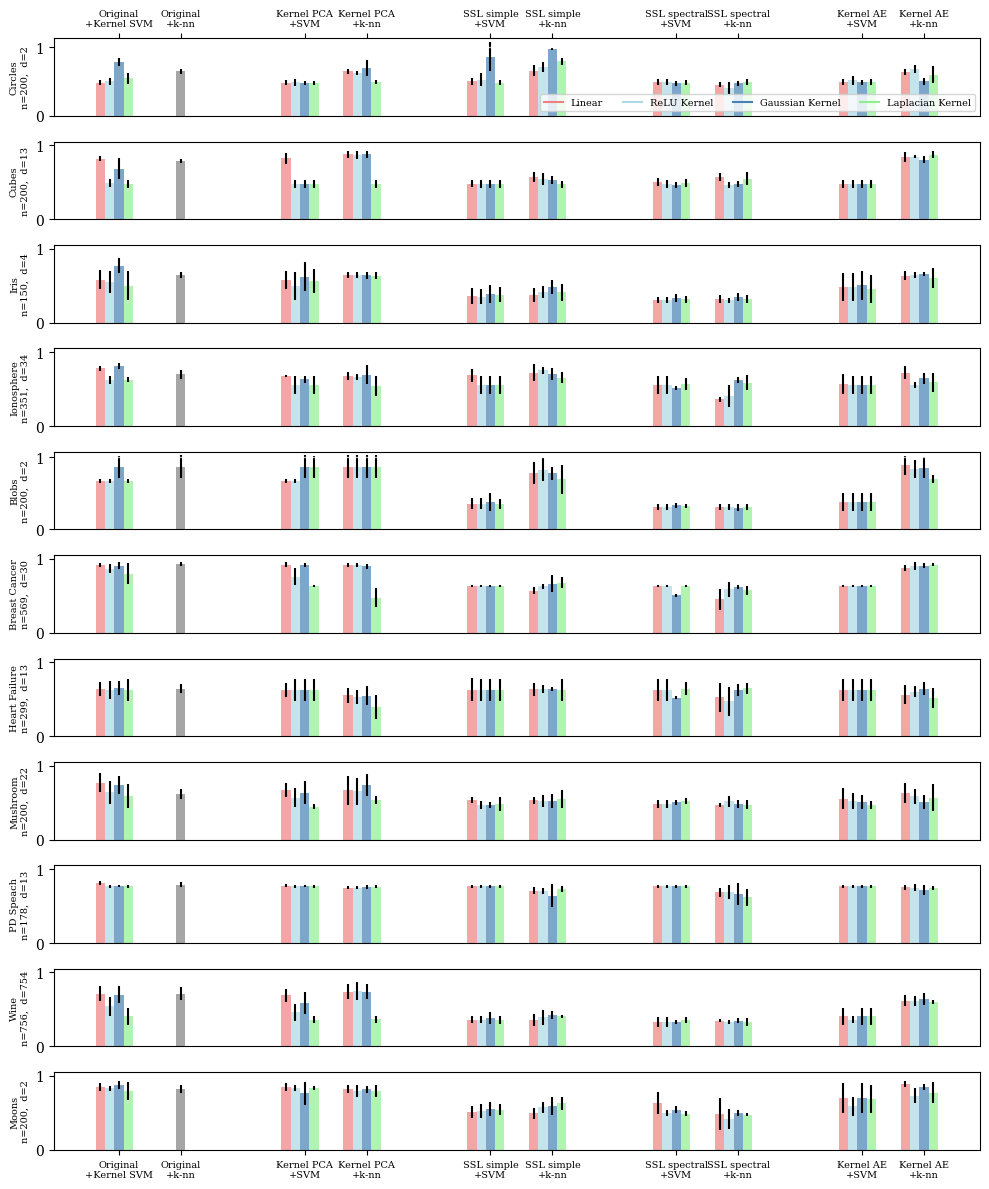

In [ ]:
fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11)) = plt.subplots(11, 1)
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams['figure.figsize'] = [10, 12]


ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]

data_name_list = ['Circles','Cubes','Iris','Ionosphere','Blobs','Breast Cancer','Heart Failure','Mushroom','PD Speach','Wine','Moons']
data_set_name_list = ['circles_factor_6','cubes','iris','ionosphere','blobs','brest_cancer','heart_failure_scale','Mushroom_sample','pd_speech','wine','moons']
N_lab_list = [0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05]
n_list = [200,200, 150,351,200,569,299,200,178,756,200]
d_list = [2,13,4,34,2,30,13,22,13,754,2]

width = 0.15
color_list = ['lightcoral', 'lightblue', 'steelblue', 'lightgreen']

for ax_idx in range(len(n_list)):

    data_set_name = data_set_name_list[ax_idx]
    N_lab = N_lab_list[ax_idx]

    all_benchmark_list = np.load('embeddings/all_benchmark_list{}_{}_lin_test_list_{}.npy'.format(int(N_lab*100),2,data_set_name))
    all_test_list = np.load('embeddings/all_test_list{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list = all_test_list[0]
    SVM_test_list = all_test_list[1]
    all_test_list_lin = np.load('embeddings/all_test_list_lin{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list_lin = all_test_list_lin[0]
    SVM_test_list_lin = all_test_list_lin[1]

    benchmark_mean = np.mean(all_benchmark_list,axis = 0)
    benchmark_std = np.std(all_benchmark_list,axis = 0)
    ax_list[ax_idx].bar(1, benchmark_mean[0], width, yerr = benchmark_std[0],color ='gray',alpha = 0.7)

    for i in range(4):
        ax_list[ax_idx].bar(0 + width*(i-2), benchmark_mean[i+1], width, yerr = benchmark_std[i+1],color = color_list[i],alpha = 0.7)

    SVM_test_list_lin_mean = np.mean(SVM_test_list_lin,axis = 0)
    SVM_test_list_lin_std = np.std(SVM_test_list_lin,axis = 0)
    SVM_test_list_mean = np.mean(SVM_test_list,axis = 0)
    SVM_test_list_std = np.std(SVM_test_list,axis = 0)
    Knn_test_list_lin_mean = np.mean(Knn_test_list_lin,axis = 0)
    Knn_test_list_lin_std = np.std(Knn_test_list_lin,axis = 0)
    Knn_test_list_mean = np.mean(Knn_test_list,axis = 0)
    Knn_test_list_std = np.std(Knn_test_list,axis = 0)

    idx = 0
    for j in range(4):
        for i in range(2):
            ax_list[ax_idx].bar(3+3*j + width*(i-2), SVM_test_list_lin_mean[idx], width, yerr = SVM_test_list_lin_std[idx],color = color_list[i],alpha = 0.7)
            ax_list[ax_idx].bar(3+3*j + width*(i), SVM_test_list_mean[idx], width, yerr = SVM_test_list_std[idx],color = color_list[i+2],alpha = 0.7)
            ax_list[ax_idx].bar(3+3*j+1 + width*(i-2), Knn_test_list_lin_mean[idx], width, yerr = Knn_test_list_lin_std[idx],color = color_list[i],alpha = 0.7)
            ax_list[ax_idx].bar(3+3*j+1 + width*(i), Knn_test_list_mean[idx], width, yerr = Knn_test_list_std[idx],color = color_list[i+2],alpha = 0.7)

            idx += 1

    ax_list[ax_idx].plot([-0.2,13.2],[1,1],color = 'white',alpha = 0.7,linewidth =1)
    ax_list[ax_idx].set_ylabel('{}\nn={},  d={}'.format(data_name_list[ax_idx], n_list[ax_idx],d_list[ax_idx]),fontsize = 7)
    ax_list[ax_idx].set_xticks([])


x = [0,1,3,4,6,7,9,10,12,13]
model_list = ['Original\n+Kernel SVM','Original\n+k-nn','Kernel PCA\n+SVM','Kernel PCA\n+k-nn','SSL simple\n+SVM','SSL simple\n+k-nn','SSL spectral\n+SVM','SSL spectral\n+k-nn','Kernel AE\n+SVM','Kernel AE\n+k-nn',]
ax_list[-1].set_xticks(x,model_list,fontsize = 7)
ax1.xaxis.set_ticks_position('top')
ax1.set_xticks(x,model_list,fontsize = 7)
label_list = ['Linear','ReLU Kernel','Gaussian Kernel','Laplacian Kernel']
for j in range(4):
    ax1.plot([],[],color = color_list[j],label = label_list[j])
ax1.legend(loc = 'lower right',ncols=5,fontsize = 7)
plt.tight_layout()
plt.savefig('paper_plots/comparison_all_models.pdf')

## Main Paper (Figure 1)

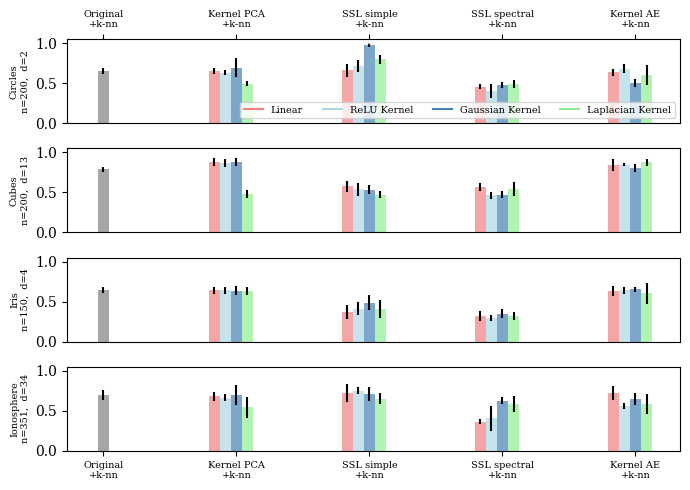

In [ ]:
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(4, 1)
plt.rcParams['figure.figsize'] = [7, 5]

ax_list = [ax1,ax2,ax3,ax4]

data_name_list = ['Circles','Cubes','Iris','Ionosphere']
data_set_name_list = ['circles_factor_6','cubes','iris','ionosphere']
n_clusters_list = [2,4,3,2]
N_lab_list = [0.1,0.05,0.05,0.05]
n_list = [200,200, 150,351]
d_list = [2,13,4,34]

width = 0.25
color_list = ['lightcoral', 'lightblue', 'steelblue', 'lightgreen']

for ax_idx in range(4):

    data_set_name = data_set_name_list[ax_idx]
    N_lab = N_lab_list[ax_idx]
    n_clusters = n_clusters_list[ax_idx]

    all_benchmark_list = np.load('embeddings/all_benchmark_list{}_{}_lin_test_list_{}.npy'.format(int(N_lab*100),2,data_set_name))
    all_test_list = np.load('embeddings/all_test_list{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list = all_test_list[0]
    SVM_test_list = all_test_list[1]
    all_test_list_lin = np.load('embeddings/all_test_list_lin{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list_lin = all_test_list_lin[0]
    SVM_test_list_lin = all_test_list_lin[1]

    benchmark_mean = np.mean(all_benchmark_list,axis = 0)
    benchmark_std = np.std(all_benchmark_list,axis = 0)

    ax_list[ax_idx].bar(1, benchmark_mean[0], width, yerr = benchmark_std[0],color ='gray',alpha = 0.7)
    SVM_test_list_lin_mean = np.mean(SVM_test_list_lin,axis = 0)
    SVM_test_list_lin_std = np.std(SVM_test_list_lin,axis = 0)
    SVM_test_list_mean = np.mean(SVM_test_list,axis = 0)
    SVM_test_list_std = np.std(SVM_test_list,axis = 0)
    Knn_test_list_lin_mean = np.mean(Knn_test_list_lin,axis = 0)
    Knn_test_list_lin_std = np.std(Knn_test_list_lin,axis = 0)
    Knn_test_list_mean = np.mean(Knn_test_list,axis = 0)
    Knn_test_list_std = np.std(Knn_test_list,axis = 0)

    idx = 0
    for j in range(4):
        for i in range(2):
            ax_list[ax_idx].bar(3+3*j+1 + width*(i-2), Knn_test_list_lin_mean[idx], width, yerr = Knn_test_list_lin_std[idx],color = color_list[i],alpha = 0.7)
            ax_list[ax_idx].bar(3+3*j+1 + width*(i), Knn_test_list_mean[idx], width, yerr = Knn_test_list_std[idx],color = color_list[i+2],alpha = 0.7)

            idx += 1

    ax_list[ax_idx].plot([0.8,13.2],[1,1],color = 'white',alpha = 0.7,linewidth =1)
    ax_list[ax_idx].set_ylabel('{}\nn={},  d={}'.format(data_name_list[ax_idx], n_list[ax_idx],d_list[ax_idx]),fontsize = 7)

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
x = [1,4,7,10,13]
model_list = ['Original\n+k-nn','Kernel PCA\n+k-nn','SSL simple\n+k-nn','SSL spectral\n+k-nn','Kernel AE\n+k-nn',]
ax4.set_xticks(x,model_list,fontsize = 7)
ax1.xaxis.set_ticks_position('top')
ax1.set_xticks(x,model_list,fontsize = 7)
label_list = ['Linear','ReLU Kernel','Gaussian Kernel','Laplacian Kernel']
for j in range(4):
    ax1.plot([],[],color = color_list[j],label = label_list[j])
ax1.legend(loc = 'lower right',ncols=5,fontsize = 7)
plt.tight_layout()
plt.savefig('paper_plots/comparison_all_models_small.pdf')

# NN comparison

## Appendix

/content/gdrive/MyDrive/Kernel_Representation_Shared


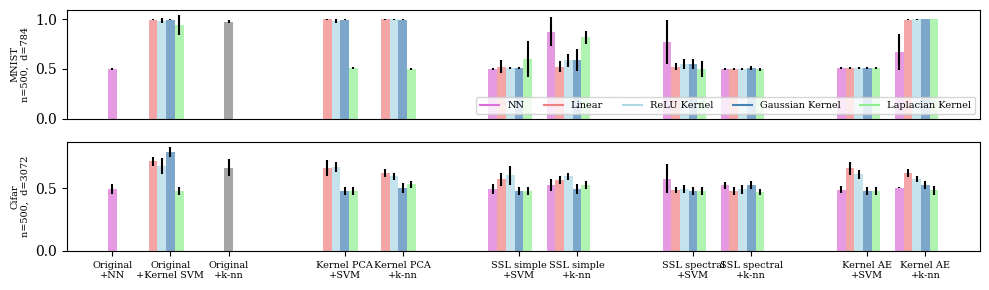

In [ ]:
%cd /content/gdrive/MyDrive/Kernel_Representation_Shared/

fig, ((ax1,ax2)) = plt.subplots(2, 1)
plt.rcParams['figure.figsize'] = [10, 3]

ax_list = [ax1,ax2]

data_name_list = ['MNIST','Cifar']
data_set_name_list = ['mnist_sample_2','cifar_sample_2']
n_clusters_list = [2,2]
N_lab_list = [0.05,0.3]
n_list = [500,500]
d_list = [784,3072]

width = 0.15
color_list = ['lightcoral', 'lightblue', 'steelblue', 'lightgreen']

for ax_idx in range(2):

    data_set_name = data_set_name_list[ax_idx]
    N_lab = N_lab_list[ax_idx]
    n_clusters = n_clusters_list[ax_idx]

    all_benchmark_list = np.load('embeddings/all_benchmark_list{}_{}_lin_test_list_{}.npy'.format(int(N_lab*100),2,data_set_name))
    all_NN_list = np.load('embeddings/all_NN_list{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    all_NN_list[all_NN_list==0]=0.5
    all_test_list = np.load('embeddings/all_test_list{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list = all_test_list[0]
    SVM_test_list = all_test_list[1]
    all_test_list_lin = np.load('embeddings/all_test_list_lin{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list_lin = all_test_list_lin[0]
    SVM_test_list_lin = all_test_list_lin[1]

    benchmark_mean = np.mean(all_benchmark_list,axis = 0)
    benchmark_std = np.std(all_benchmark_list,axis = 0)
    benchmark_NN_mean = np.mean(all_NN_list,axis = 0)
    benchmark_NN_std = np.std(all_NN_list,axis = 0)

    ax_list[ax_idx].bar(0, benchmark_NN_mean[0], width, yerr = benchmark_NN_std[0],color ='orchid',alpha = 0.7)
    ax_list[ax_idx].bar(2, benchmark_mean[0], width, yerr = benchmark_std[0],color ='gray',alpha = 0.7)

    for i in range(4):
        ax_list[ax_idx].bar(1 + width*(i-2), benchmark_mean[i+1], width, yerr = benchmark_std[i+1],color = color_list[i],alpha = 0.7)


    SVM_test_list_lin_mean = np.mean(SVM_test_list_lin,axis = 0)
    SVM_test_list_lin_std = np.std(SVM_test_list_lin,axis = 0)
    SVM_test_list_mean = np.mean(SVM_test_list,axis = 0)
    SVM_test_list_std = np.std(SVM_test_list,axis = 0)
    Knn_test_list_lin_mean = np.mean(Knn_test_list_lin,axis = 0)
    Knn_test_list_lin_std = np.std(Knn_test_list_lin,axis = 0)
    Knn_test_list_mean = np.mean(Knn_test_list,axis = 0)
    Knn_test_list_std = np.std(Knn_test_list,axis = 0)

    idx = 0
    for j in range(4):

        for i in range(2):
            ax_list[ax_idx].bar(4+3*j + width*(i-2), SVM_test_list_lin_mean[idx], width, yerr = SVM_test_list_lin_std[idx],color = color_list[i],alpha = 0.7)
            ax_list[ax_idx].bar(4+3*j + width*(i), SVM_test_list_mean[idx], width, yerr = SVM_test_list_std[idx],color = color_list[i+2],alpha = 0.7)
            ax_list[ax_idx].bar(4+3*j+1 + width*(i-2), Knn_test_list_lin_mean[idx], width, yerr = Knn_test_list_lin_std[idx],color = color_list[i],alpha = 0.7)
            ax_list[ax_idx].bar(4+3*j+1 + width*(i), Knn_test_list_mean[idx], width, yerr = Knn_test_list_std[idx],color = color_list[i+2],alpha = 0.7)

            idx += 1

    idx = 0
    for j in [7,10,13]:
        ax_list[ax_idx].bar(j + width*(-3), benchmark_NN_mean[idx], width, yerr = benchmark_NN_std[idx],color = 'orchid',alpha = 0.7)
        ax_list[ax_idx].bar(j+1 + width*(-3), benchmark_NN_mean[idx+1], width, yerr = benchmark_NN_std[idx+1],color = 'orchid',alpha = 0.7)

        idx += 2

    ax_list[ax_idx].set_ylabel('{}\nn={},  d={}'.format(data_name_list[ax_idx], n_list[ax_idx],d_list[ax_idx]),fontsize = 7)

ax1.set_xticks([])
x = [0,1,2, 4,5, 7,8, 10,11, 13,14]
model_list = ['Original\n+NN','Original\n+Kernel SVM','Original\n+k-nn','Kernel PCA\n+SVM','Kernel PCA\n+k-nn','SSL simple\n+SVM','SSL simple\n+k-nn','SSL spectral\n+SVM','SSL spectral\n+k-nn','Kernel AE\n+SVM','Kernel AE\n+k-nn']
ax2.set_xticks(x,model_list,fontsize = 7)
color_list = ['orchid','lightcoral', 'lightblue', 'steelblue', 'lightgreen']
label_list = ['NN','Linear','ReLU Kernel','Gaussian Kernel','Laplacian Kernel']
for j in range(5):
    ax1.plot([],[],color = color_list[j],label = label_list[j])
ax1.legend(loc = 'lower right',ncols=6,fontsize = 7)
plt.tight_layout()
plt.savefig('paper_plots/comparison_NN_models.pdf')

## Main Paper (Figure 2)

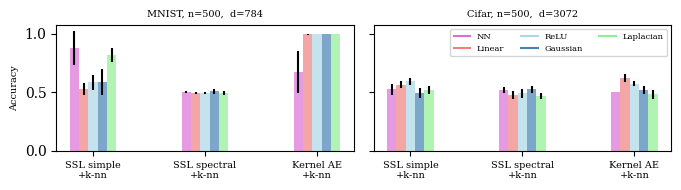

In [ ]:
fig, ((ax1),(ax2)) = plt.subplots(1, 2,sharey= True)
plt.rcParams['figure.figsize'] = [7, 5/2.5]

ax_list = [ax1,ax2]

width = 0.25
color_list = ['lightcoral', 'lightblue', 'steelblue', 'lightgreen']

for ax_idx in range(2):

    data_set_name = data_set_name_list[ax_idx]
    N_lab = N_lab_list[ax_idx]
    n_clusters = n_clusters_list[ax_idx]

    all_benchmark_list = np.load('embeddings/all_benchmark_list{}_{}_lin_test_list_{}.npy'.format(int(N_lab*100),2,data_set_name))
    all_NN_list = np.load('embeddings/all_NN_list{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    all_NN_list[all_NN_list==0]=0.5
    all_test_list = np.load('embeddings/all_test_list{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list = all_test_list[0]
    SVM_test_list = all_test_list[1]
    all_test_list_lin = np.load('embeddings/all_test_list_lin{}_{}_{}.npy'.format(int(N_lab*100),2,data_set_name))
    Knn_test_list_lin = all_test_list_lin[0]
    SVM_test_list_lin = all_test_list_lin[1]


    benchmark_mean = np.mean(all_benchmark_list,axis = 0)
    benchmark_std = np.std(all_benchmark_list,axis = 0)
    benchmark_NN_mean = np.mean(all_NN_list,axis = 0)
    benchmark_NN_std = np.std(all_NN_list,axis = 0)
    SVM_test_list_lin_mean = np.mean(SVM_test_list_lin,axis = 0)
    SVM_test_list_lin_std = np.std(SVM_test_list_lin,axis = 0)
    SVM_test_list_mean = np.mean(SVM_test_list,axis = 0)
    SVM_test_list_std = np.std(SVM_test_list,axis = 0)
    Knn_test_list_lin_mean = np.mean(Knn_test_list_lin,axis = 0)
    Knn_test_list_lin_std = np.std(Knn_test_list_lin,axis = 0)
    Knn_test_list_mean = np.mean(Knn_test_list,axis = 0)
    Knn_test_list_std = np.std(Knn_test_list,axis = 0)

    idx = 2
    for j in range(1,4):
        for i in range(2):
            ax_list[ax_idx].bar(4+3*j+1 + width*(i-2), Knn_test_list_lin_mean[idx], width, yerr = Knn_test_list_lin_std[idx],color = color_list[i],alpha = 0.7)
            ax_list[ax_idx].bar(4+3*j+1 + width*(i), Knn_test_list_mean[idx], width, yerr = Knn_test_list_std[idx],color = color_list[i+2],alpha = 0.7)

            idx += 1

    idx = 0
    for j in [7,10,13]:
        ax_list[ax_idx].bar(j+1 + width*(-3), benchmark_NN_mean[idx+1], width, yerr = benchmark_NN_std[idx+1],color = 'orchid',alpha = 0.7)
        idx += 2

    ax_list[ax_idx].set_title('{}, n={},  d={}'.format(data_name_list[ax_idx], n_list[ax_idx],d_list[ax_idx]),fontsize = 7)
ax1.set_ylabel('Accuracy',fontsize = 7)

ax1.set_xticks([])
x = [8-width, 11-width, 14-width]
model_list = ['SSL simple\n+k-nn','SSL spectral\n+k-nn','Kernel AE\n+k-nn']
ax1.set_xticks(x,model_list,fontsize = 7)
ax2.set_xticks(x,model_list,fontsize = 7)
color_list = ['orchid','lightcoral', 'lightblue', 'steelblue', 'lightgreen']
label_list = ['NN','Linear','ReLU','Gaussian','Laplacian']
for j in range(5):
    ax2.plot([],[],color = color_list[j],label = label_list[j])
ax2.legend(loc = 'upper right',ncols=3,fontsize = 6)
plt.tight_layout()
plt.savefig('paper_plots/comparison_NN_models_small.pdf')

# De-noising (Figure 3)


/content/gdrive/MyDrive/Kernel_Representation_Shared


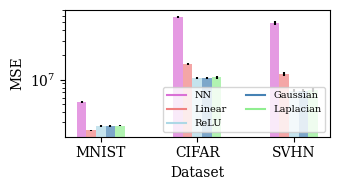

In [ ]:
%cd /content/gdrive/MyDrive/Kernel_Representation_Shared/
plt.rcParams['figure.figsize'] = [7/2, 5/2.5]


data_set_name_list = ['mnist_sample_5','cifar_sample_5','SVHN_sample_5']
width = 0.1
color_list = ['orchid','lightcoral', 'lightblue', 'steelblue', 'lightgreen']

for idx,data_set_name in enumerate(data_set_name_list):
    mse_list = np.load('de_noising/de_noising_{}.npy'.format(data_set_name))
    mse_list_mean = np.nanmean(mse_list,axis = 0)
    mse_list_std = np.nanstd(mse_list,axis = 0)

    for i in range(5):
        plt.bar(idx -width*2 + width*i,mse_list_mean[i],width,yerr = mse_list_std[i],color = color_list[i],alpha = 0.7)

color_list = ['orchid','lightcoral', 'lightblue', 'steelblue', 'lightgreen']
label_list = ['NN','Linear','ReLU','Gaussian','Laplacian']
for j in range(5):
    plt.plot([],[],color = color_list[j],label = label_list[j])

plt.legend(loc = 'lower right',ncols=2,fontsize = 7)
plt.ylabel('MSE')
x = [0,1,2]
plt.xticks(x,['MNIST', 'CIFAR', 'SVHN'])
plt.yscale('log')
plt.xlabel('Dataset')
plt.tight_layout()
plt.savefig('de_noising.pdf')